# Exploratory Data Analysis of bike-rental data
The object of the exploratory analysis is to get a good outline of the dataset and to discover first relations between the variables. The target of our analysis is the column 'cnt' and we want to discover what variables are best for predicting future bike rental numbers per hour.

In [37]:
#import all needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
# import data set and set output parameters of pandas
df = pd.read_csv('hour.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 130)

cmap = ['dark blue','blue','light blue','light green','yellow','orange','red']

 First let's get a basic understanding of what our dataframe looks like.

In [60]:
print('Shape of the Dataframe: \n{} columns,\n{} rows'.format(df.shape[1], df.shape[0]))
df.head()

Shape of the Dataframe: 
17 columns,
17379 rows


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
print('Data types of every column:\n')
df.info()

Data types of every column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
print('Description columns:')
df[['casual', 'registered', 'cnt']].describe()

Description columns:


,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


## Distribution graph
Let's also check the variables for linearity and skewness.

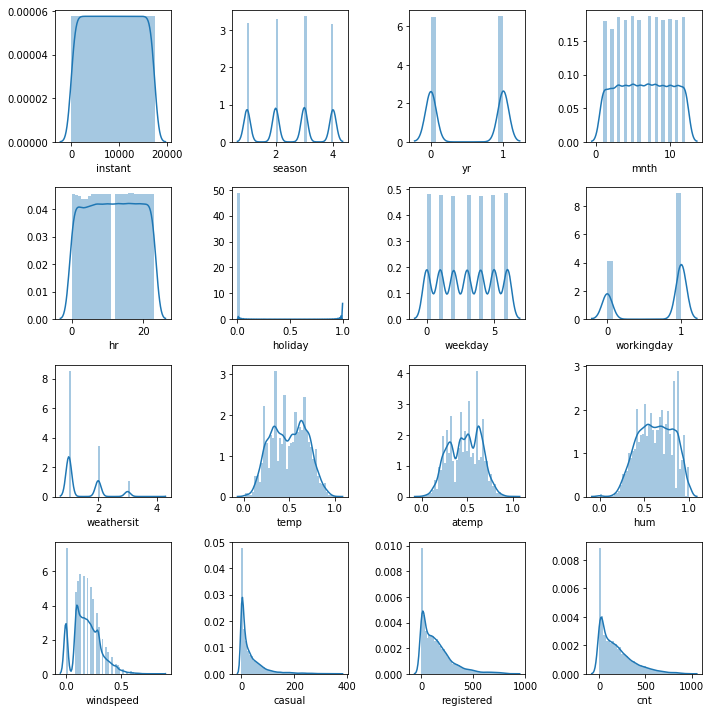

In [50]:
counter = 1
non_date = df.drop(['dteday'], axis=1)
for col in non_date:
    plt.subplot(4, 4, counter)
    sns.distplot(non_date[col])
    counter += 1

plt.tight_layout()
plt.show()

## Correlation analysis
Because the target of this analysis is the amount of bike rentals per hour ('cnt'), we show a correlation graph and inspect the correlations between the variables.

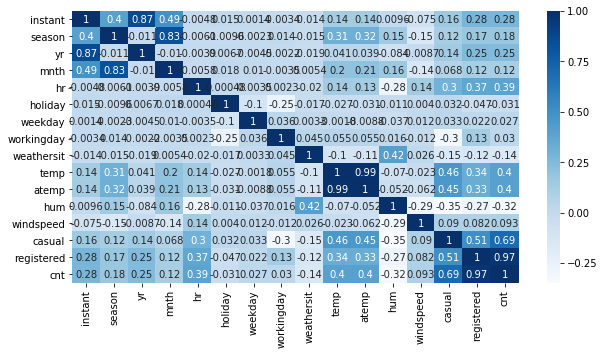

In [66]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

The graph shows multiple interesting correlations:
1. The biggest correlation from 'cnt' is to 'temp', 'atemp' and 'hour'.
2. 'temp', 'atemp' are strongly correlated and one should be removed to prevent the issue of Multicollinearity (a given feature in the model can be approximated by a linear combination of the other features in the model).
3. Also the variables 'casual' and 'registered should be removed, because they make up the 'cnt'.

In [27]:
# Remove variables
df.drop(['atemp', 'casual', 'registered'], axis=1, inplace=True)
print(df.shape)

(17379, 16)


## Bike rentals per hour
Next the hour of day and temperature will be further investigated. This is shown in three graphs. One for the amount of bike rentals per working day, one per non-working day and one for every day. The count is scattered and the temperature is shown by the color of each data point. The mean is represented by a black line.

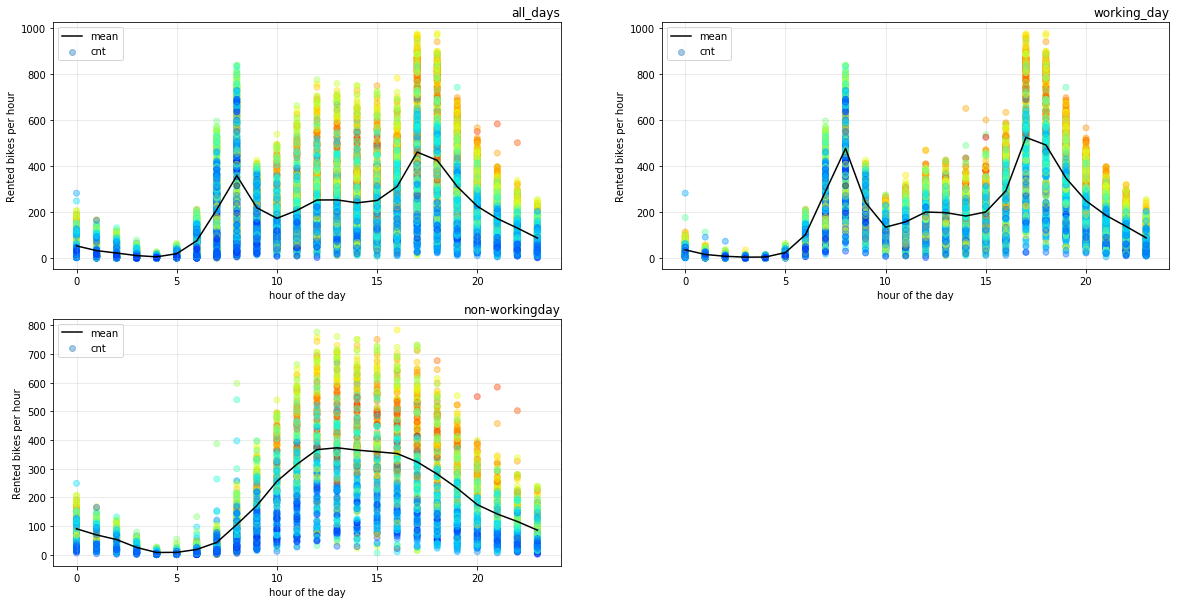

In [68]:
pos = 1
for d in ['all_days', 'working_day', 'non-workingday']:
    if d == 'all_days':
        day = df
    elif d == 'working_day':
        day = df[df['workingday'] == 1]
    elif d == 'non-workingday':
        day = df[df['workingday'] == 0]


    day_hr = day.groupby(['hr']).mean()
    plt.subplot(2, 2, pos)
    pos += 1
    plt.scatter(day['hr'], day['cnt'], c=day['temp'], alpha=0.4, cmap='jet')
    plt.plot(day_hr['cnt'], color='0', label='mean')
    plt.title(d, loc='right')
    plt.ylabel('Rented bikes per hour')
    plt.xlabel('hour of the day')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)

plt.rcParams['figure.figsize'] = (20,10)

The graphs show very clearly that on working days the bikes are rented mostly in the morning and late afternoon. With a big drop in rents per hour in the middle of the day. The peaks represent the hours where a normal work day starts and ends, which suggests that the bikes are often used to commute to work and back.

On non-working days like holidays and weekends the usage is highest from around 10:00 AM to 7:00 PM. On these days people sleep longer and don't have to work, which explains the more evenly distributed usage.

## Usage over entire time span
The following graph shows the number of 'cnt' for the entire time span from January 2011 till December 2012. The temperature is also shown as the color, lighter points representing warmer hours. The mean is again represented by a black line.

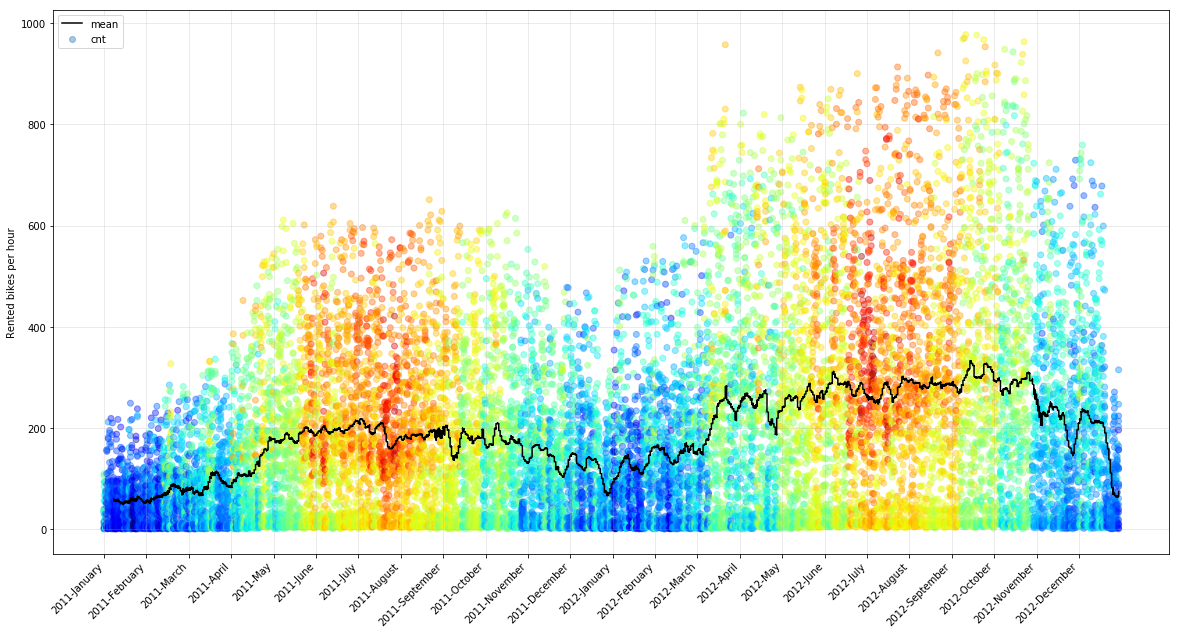

In [74]:
months_xticks = []
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
            'November', 'December']
for i in ['2011', '2012']:
    for j in range(12):
        months_xticks.append(i + '-' + months[j])
locs = [i * 30.5 for i in range(24)]
plt.xticks(locs, months_xticks, rotation=45, horizontalalignment='right')
plt.scatter(df['dteday'], df['cnt'], c=df['temp'], alpha=0.4, cmap='jet')
plt.plot(df['dteday'], df['cnt'].rolling(24*7, win_type='boxcar').mean(), color='0', label='mean')
plt.ylabel('Rented bikes per hour')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = (20,7)
plt.grid(True, alpha=0.3)

We can conclude that bikes are rented more often in the warmer months of the year, clearly shown by the color. Also in 2012 were generally more bikes rented than in 2011, which indicates a increasing trend.

## Seasons
Let's have a closer look on the impact of which season the bikes are rented.

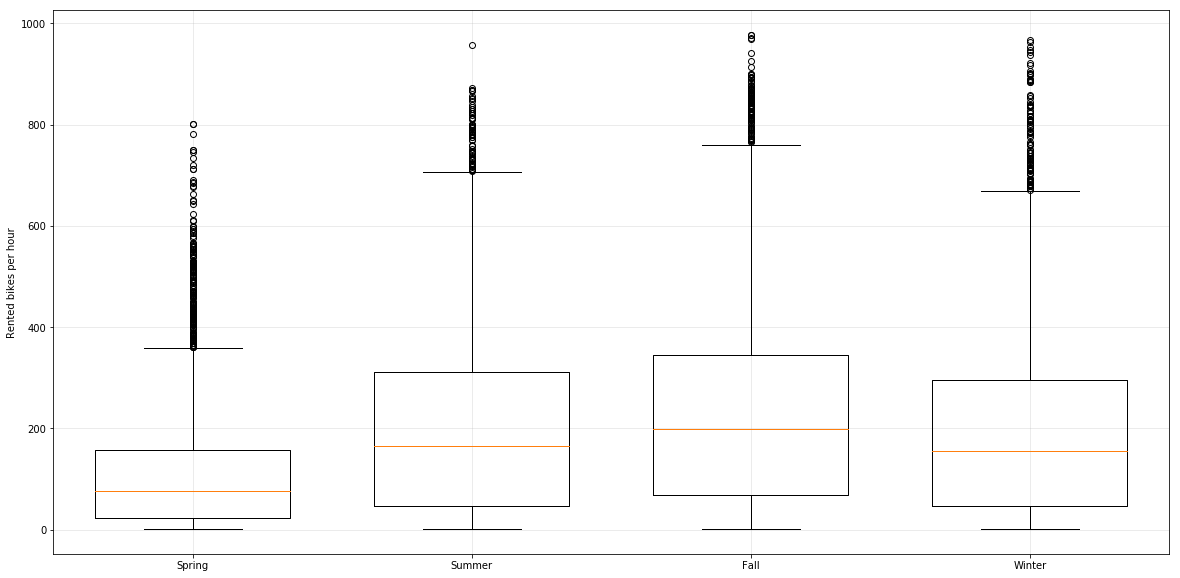

In [70]:
season_1 = df[df['season']==1]
season_2 = df[df['season']==2]
season_3 = df[df['season']==3]
season_4 = df[df['season']==4]

data = [season_1['cnt'], season_2['cnt'], season_3['cnt'], season_4['cnt']]
plt.boxplot(data, labels=['Spring', 'Summer','Fall', 'Winter'], widths=0.7)
plt.ylabel('Rented bikes per hour')
plt.grid(True, alpha=0.3)

Surprisingly, there are more rentals in winter (season 4) than in spring (season 1).

## Next step: 
Build a hourly predication model for the amount of rented bikes ('cnt').